In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df =pd.read_csv('/content/force2020_data_unsupervised_learning.csv')

In [ ]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RHOB,12202.0,2.149947,0.251592,1.493417,1.983767,2.059335,2.389839,2.889454
GR,12202.0,61.253852,29.902708,6.191506,42.792794,62.886322,77.726776,499.022583
DEPTH_MD,12202.0,2066.272839,535.691815,1138.704000,1602.342000,2065.980000,2530.226000,2993.864000
NPHI,12202.0,0.414572,0.139207,0.037976,0.313797,0.466891,0.513840,0.800262
PEF,12202.0,3.912313,1.816933,1.126667,2.629141,3.365132,4.686422,17.026619
DTC,12202.0,121.409905,30.394369,55.726753,89.977041,138.477173,146.242302,163.910797


In [ ]:
scaler = StandardScaler()

In [ ]:
df[['RHOB_T', 'NPHI_T', 'GR_T', 'PEF_T', 'DTC_T']] = scaler.fit_transform(df[['RHOB', 'NPHI', 'GR', 'PEF', 'DTC']])

In [ ]:
def optimise_k_means(data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

optimise_k_means(df[['RHOB_T', 'NPHI_T']], 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
#Most important

kmeans = KMeans(n_clusters =3)
kmeans.fit(df[['RHOB_T', 'NPHI_T']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
df['kmeans_3'] = kmeans.labels_

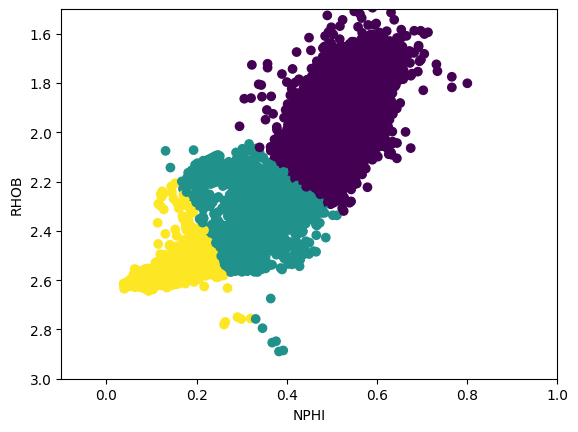

In [ ]:
#plot result

plt.scatter(x=df['NPHI'], y=df['RHOB'], c=df['kmeans_3'])
plt.xlabel('NPHI')
plt.ylabel('RHOB')
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
plt.show()

In [ ]:
# Create Multiple Clusters

for k in range(1, 6):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df[['RHOB_T', 'NPHI_T']])

  df[f'kmeans_{k}'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_3,kmeans_1,kmeans_2,kmeans_4,kmeans_5
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531,0,0,0,0,1
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042,0,0,0,0,1
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350,0,0,0,0,1
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297,0,0,0,0,1
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449,1,0,1,2,3
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891,1,0,1,2,3
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910,1,0,1,2,3
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,-0.339430,1.157682,0.722114,-1.095690,1,0,1,2,3


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start=1):
  ax.scatter(x=df['NPHI'], y=df['RHOB'], c=df[f'KMeans_{i+1}'])
  ax.set_ylim(3, 1.5)
  ax.set_xlim(0, 1)
  ax.set_title(f'N Clusters={i+1}')

In [ ]:
|